In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ast import literal_eval
from collections import defaultdict

In [2]:
def get_results(interest_parameter, nmf_method):
    with open(f'Results/Register_{nmf_method}.txt', 'r', encoding='utf8') as file:
        # Definición de los diccionarios que ordenarán los resultados para cada 
        # parámetro 
        temp_corr_dict = defaultdict(list)
        spec_corr_dict = defaultdict(list)
        mse_dict = defaultdict(list)
        sdr_dict = defaultdict(list)

        for line in file:
            # Obteniendo el diccionario de interés
            dict_to_rev = literal_eval(line.strip())
            
            if not dict_to_rev['filter_parameters']['bool']:
                # Añadiendo información a los diccionarios en base a los criterios
                temp_corr_dict[dict_to_rev[interest_parameter]].extend(dict_to_rev['Temp'])
                spec_corr_dict[dict_to_rev[interest_parameter]].extend(dict_to_rev['Spec'])
                mse_dict[dict_to_rev[interest_parameter]].extend(dict_to_rev['MSE'])
                sdr_dict[dict_to_rev[interest_parameter]].extend(dict_to_rev['SDR'])
            
    return temp_corr_dict, spec_corr_dict, mse_dict, sdr_dict


def get_noverlap_results(nmf_method):
    # Tipos de noverlap
    nov_types = (0.5, 0.75, 0.9)
    
    with open(f'Results/Register_{nmf_method}.txt', 'r', encoding='utf8') as file:
        # Definición de los diccionarios que ordenarán los resultados para cada 
        # parámetro 
        temp_corr_dict = defaultdict(list)
        spec_corr_dict = defaultdict(list)
        mse_dict = defaultdict(list)
        sdr_dict = defaultdict(list)

        for line in file:
            # Obteniendo el diccionario de interés
            dict_to_rev = literal_eval(line.strip())
            
            # Obtención de la razón noverlap de esta simulación
            nov_i = dict_to_rev['noverlap'] / dict_to_rev['N']
            
            # Obteniendo el tipo de noverlap
            index = np.argmin([abs(nov_i - i) for i in nov_types])
            
            # Definiendo el tipo de noverlap usado
            used_nov = nov_types[index]
            
            if not dict_to_rev['filter_parameters']['bool']:
                # Añadiendo información a los diccionarios en base a los criterios
                temp_corr_dict[used_nov].extend(dict_to_rev['Temp'])
                spec_corr_dict[used_nov].extend(dict_to_rev['Spec'])
                mse_dict[used_nov].extend(dict_to_rev['MSE'])
                sdr_dict[used_nov].extend(dict_to_rev['SDR'])
            
    return temp_corr_dict, spec_corr_dict, mse_dict, sdr_dict


def get_filter_params_results(nmf_method):
    with open(f'Results/Register_{nmf_method}.txt', 'r', encoding='utf8') as file:
        # Definición de los diccionarios que ordenarán los resultados para cada 
        # parámetro 
        temp_corr_dict = defaultdict(list)
        spec_corr_dict = defaultdict(list)
        mse_dict = defaultdict(list)
        sdr_dict = defaultdict(list)

        for line in file:
            # Obteniendo el diccionario de interés
            dict_to_rev = literal_eval(line.strip())
            
            # Lectura del booleano de interés
            filter_params_i = dict_to_rev[interest_parameter]

            # Añadiendo información a los diccionarios en base a los criterios
            temp_corr_dict[filter_params_i['bool']].extend(dict_to_rev['Temp'])
            spec_corr_dict[filter_params_i['bool']].extend(dict_to_rev['Spec'])
            mse_dict[filter_params_i['bool']].extend(dict_to_rev['MSE'])
            sdr_dict[filter_params_i['bool']].extend(dict_to_rev['SDR'])
            
    return temp_corr_dict, spec_corr_dict, mse_dict, sdr_dict


def get_table_results(N, nov, dec_criteria, bool_filt, nmf_method):
    with open(f'Results/Register_{nmf_method}.txt', 'r', encoding='utf8') as file:
        # Definición de los diccionarios que ordenarán los resultados para cada 
        # parámetro 
        temp_corr_dict = defaultdict(list)
        spec_corr_dict = defaultdict(list)
        mse_dict = defaultdict(list)
        sdr_dict = defaultdict(list)

        for line in file:
            # Obteniendo el diccionario de interés
            dict_to_rev = literal_eval(line.strip())
            
            # Si es que cumple con la definición del análisis realizado
            if (dict_to_rev['N'] == N and dict_to_rev['noverlap'] == int(nov * N) and
                dict_to_rev['dec_criteria'] == dec_criteria and
                dict_to_rev['filter_parameters']['bool'] == bool_filt):
                # Definir la combinación beta/n_comps para guardar los datos
                index_to = (dict_to_rev['beta'], dict_to_rev['n_components'])
                
                # Añadiendo información a los diccionarios en base a los criterios
                temp_corr_dict[index_to].extend(dict_to_rev['Temp'])
                spec_corr_dict[index_to].extend(dict_to_rev['Spec'])
                mse_dict[index_to].extend(dict_to_rev['MSE'])
                sdr_dict[index_to].extend(dict_to_rev['SDR'])
            
    return temp_corr_dict, spec_corr_dict, mse_dict, sdr_dict

# Gráficos animados para la presentación final

## Parámetro criterios

In [3]:
def get_results(interest_parameter, nmf_method):
    with open(f'Results/Register_{nmf_method}.txt', 'r', encoding='utf8') as file:
        # Definición de los diccionarios que ordenarán los resultados para cada 
        # parámetro 
        temp_corr_dict = defaultdict(list)
        spec_corr_dict = defaultdict(list)
        mse_dict = defaultdict(list)
        sdr_dict = defaultdict(list)

        for line in file:
            # Obteniendo el diccionario de interés
            dict_to_rev = literal_eval(line.strip())
            
            if (not dict_to_rev['filter_parameters']['bool'] and
                dict_to_rev['N'] == 2048 and dict_to_rev['noverlap'] == int(0.9 * 2048)):
                # Añadiendo información a los diccionarios en base a los criterios
                temp_corr_dict[dict_to_rev[interest_parameter]].extend(dict_to_rev['Temp'])
                spec_corr_dict[dict_to_rev[interest_parameter]].extend(dict_to_rev['Spec'])
                mse_dict[dict_to_rev[interest_parameter]].extend(dict_to_rev['MSE'])
                sdr_dict[dict_to_rev[interest_parameter]].extend(dict_to_rev['SDR'])
            
    return temp_corr_dict, spec_corr_dict, mse_dict, sdr_dict

In [4]:
interest_parameter = 'dec_criteria'

temp_all, spec_all, mse_all, sdr_all = \
        get_results(interest_parameter, nmf_method='to_all')
temp_seg, spec_seg, mse_seg, sdr_seg = \
        get_results(interest_parameter, nmf_method='on_segments')
temp_mask, spec_mask, mse_mask, sdr_mask = \
        get_results(interest_parameter, nmf_method='masked_segments')
temp_repl, spec_repl, mse_repl, sdr_repl = \
        get_results(interest_parameter, nmf_method='replace_segments')

print(len(temp_all['vote']))

192


<IPython.core.display.Javascript object>


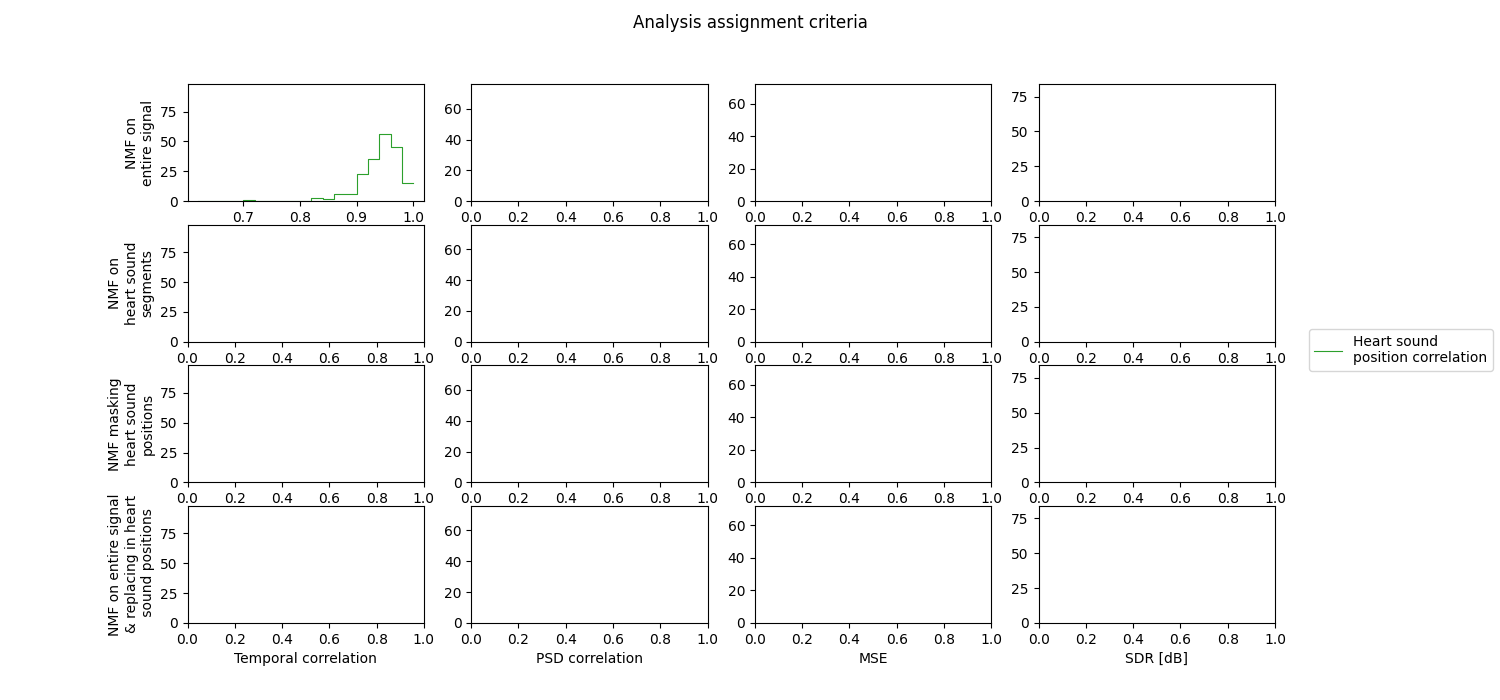

('spec_criterion', 'energy_criterion', 'temp_criterion')


In [22]:
%matplotlib notebook
def hist_plots_decision_0(fig, ax, bins=40, linewidth=0.8, corr_interval=(0.6, 1),
                           psd_interval=(0.9, 1), mse_interval=(0, 0.015), 
                           sdr_interval=(0, 20)):
    def _plot_hist(num, input_array, bins, axs, interval=None, label=None,
                   plot_bool=False):
        hist, bin_edges = np.histogram(a=input_array, bins=bins, range=interval)
        bins_plot = [np.mean(bin_edges[i:i+2]) for i in range(len(bin_edges) - 1)]
        
        if label == 'spec_criterion':
            label_to = 'Pure lung sound\nspectral correlation'
        elif label == 'energy_criterion':
            label_to = 'Spectral distribution'
        elif label == 'temp_criterion':
            label_to = 'Heart sound\nposition correlation'
        
        # Definición de las líneas de centro de masa
        mean_line = np.average(bins_plot, weights=hist)
        
        if plot_bool:
            if label is None:
                axs.step(bin_edges[1:], hist, color=f'C{num}', linewidth=linewidth)
#                 axs.axvline(mean_line, color=f'C{num}', linewidth=2)
            else:
                axs.step(bin_edges[1:], hist, color=f'C{num}', label=label_to, linewidth=linewidth)
#                 axs.axvline(mean_line, color=f'C{num}', linewidth=2)
        
        return hist
    
    
    # Definición de las posibilidades de N
    dec_list = ('spec_criterion', 'energy_criterion', 'temp_criterion')
    
    if corr_interval is None:
        corr_interval = (0,1)
        
    if psd_interval is None:
        psd_interval = (0,1)
    
    if mse_interval is None:
        # Definición del límite máximo x para MSE
        max_mse_x_list = list()

        for dec in dec_list:
            max_mse_x_list.append(max(mse_all[dec]))
            max_mse_x_list.append(max(mse_seg[dec]))
            max_mse_x_list.append(max(mse_mask[dec]))
            max_mse_x_list.append(max(mse_repl[dec]))

        max_mse_x = max(max_mse_x_list)
        mse_interval = (0, max_mse_x)
        
    if sdr_interval is None:
        # Definición del límite máximo x para SDR
        max_sdr_x_list = list()

        for dec in dec_list:
            max_sdr_x_list.append(max(sdr_all[dec]))
            max_sdr_x_list.append(max(sdr_seg[dec]))
            max_sdr_x_list.append(max(sdr_mask[dec]))
            max_sdr_x_list.append(max(sdr_repl[dec]))

        max_sdr_x = max(max_sdr_x_list)
        sdr_interval = (0, max_sdr_x)
    
    
    # Definición del límite máximo y
    max_temp_y = 0
    max_spec_y = 0
    max_mse_y = 0
    max_sdr_y = 0
    
    # Lista para cada uno de los histogramas a realizar
    hist_dict = defaultdict(list)
    print(dec_list)
    # Temporal correlation
    for num, dec in enumerate(dec_list):
        ####      Obtener los histogramas      ####
        # to_all
        plot_to = True if dec == 'temp_criterion' else False
        hist_temp_all = _plot_hist(num, temp_all[dec], bins=bins, axs=ax[0][0], interval=corr_interval, 
                                   label=dec, plot_bool=plot_to)
        hist_spec_all = _plot_hist(num, spec_all[dec], bins=bins, axs=ax[0][1], interval=psd_interval)
        hist_mse_all = _plot_hist(num, mse_all[dec], bins=bins, axs=ax[0][2], interval=mse_interval)
        hist_sdr_all = _plot_hist(num, sdr_all[dec], bins=bins, axs=ax[0][3], interval=sdr_interval)
        
        # on_segments
        hist_temp_seg = _plot_hist(num, temp_seg[dec], bins=bins, axs=ax[1][0], interval=corr_interval)
        hist_spec_seg = _plot_hist(num, spec_seg[dec], bins=bins, axs=ax[1][1], interval=psd_interval)
        hist_mse_seg = _plot_hist(num, mse_seg[dec], bins=bins, axs=ax[1][2], interval=mse_interval)
        hist_sdr_seg = _plot_hist(num, sdr_seg[dec], bins=bins, axs=ax[1][3], interval=sdr_interval)
        
        # masked_segments
        hist_temp_mask = _plot_hist(num, temp_mask[dec], bins=bins, axs=ax[2][0], interval=corr_interval)
        hist_spec_mask = _plot_hist(num, spec_mask[dec], bins=bins, axs=ax[2][1], interval=psd_interval)
        hist_mse_mask = _plot_hist(num, mse_mask[dec], bins=bins, axs=ax[2][2], interval=mse_interval)
        hist_sdr_mask = _plot_hist(num, sdr_mask[dec], bins=bins, axs=ax[2][3], interval=sdr_interval)
        
        # replaced_segments
        hist_temp_repl = _plot_hist(num, temp_repl[dec], bins=bins, axs=ax[3][0], interval=corr_interval)
        hist_spec_repl = _plot_hist(num, spec_repl[dec], bins=bins, axs=ax[3][1], interval=psd_interval)
        hist_mse_repl = _plot_hist(num, mse_repl[dec], bins=bins, axs=ax[3][2], interval=mse_interval)
        hist_sdr_repl = _plot_hist(num, sdr_repl[dec], bins=bins, axs=ax[3][3], interval=sdr_interval)
        
        # Máximos para los límites de los ejes y
        max_temp_y = max(max_temp_y, max(hist_temp_all), 
                         max(hist_temp_seg), max(hist_temp_mask),
                         max(hist_temp_repl)) 
        max_spec_y = max(max_spec_y, max(hist_spec_all), 
                         max(hist_spec_seg), max(hist_spec_mask),
                         max(hist_spec_repl))
        max_mse_y = max(max_mse_y, max(hist_mse_all), 
                        max(hist_mse_seg), max(hist_mse_mask),
                        max(hist_mse_repl))
        max_sdr_y = max(max_sdr_y, max(hist_sdr_all), 
                        max(hist_sdr_seg), max(hist_sdr_mask),
                        max(hist_sdr_repl))
        
        # Lista para cada uno de los histogramas a realizar
        hist_dict[(0, 0)].append(hist_temp_all)
        hist_dict[(0, 1)].append(hist_spec_all)
        hist_dict[(0, 2)].append(hist_mse_all)
        hist_dict[(0, 3)].append(hist_sdr_all)
        hist_dict[(1, 0)].append(hist_temp_seg)
        hist_dict[(1, 1)].append(hist_spec_seg)
        hist_dict[(1, 2)].append(hist_mse_seg)
        hist_dict[(1, 3)].append(hist_sdr_seg)
        hist_dict[(2, 0)].append(hist_temp_mask)
        hist_dict[(2, 1)].append(hist_spec_mask)
        hist_dict[(2, 2)].append(hist_mse_mask)
        hist_dict[(2, 3)].append(hist_sdr_mask)
        hist_dict[(3, 0)].append(hist_temp_repl)
        hist_dict[(3, 1)].append(hist_spec_repl)
        hist_dict[(3, 2)].append(hist_mse_repl)
        hist_dict[(3, 3)].append(hist_sdr_repl)
    
        
    # Seteando los ylabel
    ax[0][0].set_ylabel('NMF on\nentire signal')
    ax[0][1].set_ylabel('')
    ax[0][2].set_ylabel('')
    ax[0][3].set_ylabel('')
    ax[1][0].set_ylabel('NMF on\nheart sound\nsegments')
    ax[1][1].set_ylabel('')
    ax[1][2].set_ylabel('')
    ax[1][3].set_ylabel('')
    ax[2][0].set_ylabel('NMF masking\nheart sound\npositions')
    ax[2][1].set_ylabel('')
    ax[2][2].set_ylabel('')
    ax[2][3].set_ylabel('')
    ax[3][0].set_ylabel('NMF on entire signal\n& replacing in heart\n sound positions')
    ax[3][1].set_ylabel('')
    ax[3][2].set_ylabel('')
    ax[3][3].set_ylabel('')

    # Seteando los títulos
    ax[3][0].set_xlabel('Temporal correlation')
    ax[3][1].set_xlabel('PSD correlation')
    ax[3][2].set_xlabel('MSE')
    ax[3][3].set_xlabel('SDR [dB]')

    # Seteando las leyendas
    fig.legend(loc='center right')
    
    # Ajustando los límites
    ax[0][0].set_ylim([0, max_temp_y])
    ax[1][0].set_ylim([0, max_temp_y])
    ax[2][0].set_ylim([0, max_temp_y])
    ax[3][0].set_ylim([0, max_temp_y])

    ax[0][1].set_ylim([0, max_spec_y])
    ax[1][1].set_ylim([0, max_spec_y])
    ax[2][1].set_ylim([0, max_spec_y])
    ax[3][1].set_ylim([0, max_spec_y])

    ax[0][2].set_ylim([0, max_mse_y])
    ax[1][2].set_ylim([0, max_mse_y])
    ax[2][2].set_ylim([0, max_mse_y])
    ax[3][2].set_ylim([0, max_mse_y])

    ax[0][3].set_ylim([0, max_sdr_y])
    ax[1][3].set_ylim([0, max_sdr_y])
    ax[2][3].set_ylim([0, max_sdr_y])
    ax[3][3].set_ylim([0, max_sdr_y])
    # Ajustando las etiquetas del eje
    fig.align_ylabels(ax[:])
    fig.subplots_adjust(right=0.85)
    fig.suptitle(r'Analysis assignment criteria')
    
    plt.savefig('Images/Defensa/criteria_analysis_0.png')
    plt.show()


def hist_plots_decision_1(fig, ax, bins=40, linewidth=0.8, corr_interval=(0.6, 1),
                           psd_interval=(0.9, 1), mse_interval=(0, 0.015), 
                           sdr_interval=(0, 20)):
    def _plot_hist(num, input_array, bins, axs, interval=None, label=None,
                   plot_bool=False):
        hist, bin_edges = np.histogram(a=input_array, bins=bins, range=interval)
        bins_plot = [np.mean(bin_edges[i:i+2]) for i in range(len(bin_edges) - 1)]
        
        if label == 'spec_criterion':
            label_to = 'Pure lung sound\nspectral correlation'
        elif label == 'energy_criterion':
            label_to = 'Spectral distribution'
        elif label == 'temp_criterion':
            label_to = 'Heart sound\nposition correlation'
        
        # Definición de las líneas de centro de masa
        mean_line = np.average(bins_plot, weights=hist)
        
        if plot_bool:
            if label is None:
                axs.step(bin_edges[1:], hist, color=f'C{num}', linewidth=linewidth)
                axs.axvline(mean_line, color=f'C{num}', linewidth=2)
            else:
                axs.step(bin_edges[1:], hist, color=f'C{num}', label=label_to, linewidth=linewidth)
                axs.axvline(mean_line, color=f'C{num}', linewidth=2)
        
        return hist
    
    
    # Definición de las posibilidades de N
    dec_list = ('spec_criterion', 'energy_criterion', 'temp_criterion')
    
    if corr_interval is None:
        corr_interval = (0,1)
        
    if psd_interval is None:
        psd_interval = (0,1)
    
    if mse_interval is None:
        # Definición del límite máximo x para MSE
        max_mse_x_list = list()

        for dec in dec_list:
            max_mse_x_list.append(max(mse_all[dec]))
            max_mse_x_list.append(max(mse_seg[dec]))
            max_mse_x_list.append(max(mse_mask[dec]))
            max_mse_x_list.append(max(mse_repl[dec]))

        max_mse_x = max(max_mse_x_list)
        mse_interval = (0, max_mse_x)
        
    if sdr_interval is None:
        # Definición del límite máximo x para SDR
        max_sdr_x_list = list()

        for dec in dec_list:
            max_sdr_x_list.append(max(sdr_all[dec]))
            max_sdr_x_list.append(max(sdr_seg[dec]))
            max_sdr_x_list.append(max(sdr_mask[dec]))
            max_sdr_x_list.append(max(sdr_repl[dec]))

        max_sdr_x = max(max_sdr_x_list)
        sdr_interval = (0, max_sdr_x)
    
    
    # Definición del límite máximo y
    max_temp_y = 0
    max_spec_y = 0
    max_mse_y = 0
    max_sdr_y = 0
    
    # Lista para cada uno de los histogramas a realizar
    hist_dict = defaultdict(list)
    print(dec_list)
    # Temporal correlation
    for num, dec in enumerate(dec_list):
        ####      Obtener los histogramas      ####
        # to_all
        plot_to = True if dec == 'temp_criterion' else False
        hist_temp_all = _plot_hist(num, temp_all[dec], bins=bins, axs=ax[0][0], interval=corr_interval, 
                                   label=dec, plot_bool=plot_to)
        hist_spec_all = _plot_hist(num, spec_all[dec], bins=bins, axs=ax[0][1], interval=psd_interval)
        hist_mse_all = _plot_hist(num, mse_all[dec], bins=bins, axs=ax[0][2], interval=mse_interval)
        hist_sdr_all = _plot_hist(num, sdr_all[dec], bins=bins, axs=ax[0][3], interval=sdr_interval)
        
        # on_segments
        hist_temp_seg = _plot_hist(num, temp_seg[dec], bins=bins, axs=ax[1][0], interval=corr_interval)
        hist_spec_seg = _plot_hist(num, spec_seg[dec], bins=bins, axs=ax[1][1], interval=psd_interval)
        hist_mse_seg = _plot_hist(num, mse_seg[dec], bins=bins, axs=ax[1][2], interval=mse_interval)
        hist_sdr_seg = _plot_hist(num, sdr_seg[dec], bins=bins, axs=ax[1][3], interval=sdr_interval)
        
        # masked_segments
        hist_temp_mask = _plot_hist(num, temp_mask[dec], bins=bins, axs=ax[2][0], interval=corr_interval)
        hist_spec_mask = _plot_hist(num, spec_mask[dec], bins=bins, axs=ax[2][1], interval=psd_interval)
        hist_mse_mask = _plot_hist(num, mse_mask[dec], bins=bins, axs=ax[2][2], interval=mse_interval)
        hist_sdr_mask = _plot_hist(num, sdr_mask[dec], bins=bins, axs=ax[2][3], interval=sdr_interval)
        
        # replaced_segments
        hist_temp_repl = _plot_hist(num, temp_repl[dec], bins=bins, axs=ax[3][0], interval=corr_interval)
        hist_spec_repl = _plot_hist(num, spec_repl[dec], bins=bins, axs=ax[3][1], interval=psd_interval)
        hist_mse_repl = _plot_hist(num, mse_repl[dec], bins=bins, axs=ax[3][2], interval=mse_interval)
        hist_sdr_repl = _plot_hist(num, sdr_repl[dec], bins=bins, axs=ax[3][3], interval=sdr_interval)
        
        # Máximos para los límites de los ejes y
        max_temp_y = max(max_temp_y, max(hist_temp_all), 
                         max(hist_temp_seg), max(hist_temp_mask),
                         max(hist_temp_repl)) 
        max_spec_y = max(max_spec_y, max(hist_spec_all), 
                         max(hist_spec_seg), max(hist_spec_mask),
                         max(hist_spec_repl))
        max_mse_y = max(max_mse_y, max(hist_mse_all), 
                        max(hist_mse_seg), max(hist_mse_mask),
                        max(hist_mse_repl))
        max_sdr_y = max(max_sdr_y, max(hist_sdr_all), 
                        max(hist_sdr_seg), max(hist_sdr_mask),
                        max(hist_sdr_repl))
        
        # Lista para cada uno de los histogramas a realizar
        hist_dict[(0, 0)].append(hist_temp_all)
        hist_dict[(0, 1)].append(hist_spec_all)
        hist_dict[(0, 2)].append(hist_mse_all)
        hist_dict[(0, 3)].append(hist_sdr_all)
        hist_dict[(1, 0)].append(hist_temp_seg)
        hist_dict[(1, 1)].append(hist_spec_seg)
        hist_dict[(1, 2)].append(hist_mse_seg)
        hist_dict[(1, 3)].append(hist_sdr_seg)
        hist_dict[(2, 0)].append(hist_temp_mask)
        hist_dict[(2, 1)].append(hist_spec_mask)
        hist_dict[(2, 2)].append(hist_mse_mask)
        hist_dict[(2, 3)].append(hist_sdr_mask)
        hist_dict[(3, 0)].append(hist_temp_repl)
        hist_dict[(3, 1)].append(hist_spec_repl)
        hist_dict[(3, 2)].append(hist_mse_repl)
        hist_dict[(3, 3)].append(hist_sdr_repl)
    
        
    # Seteando los ylabel
    ax[0][0].set_ylabel('NMF on\nentire signal')
    ax[0][1].set_ylabel('')
    ax[0][2].set_ylabel('')
    ax[0][3].set_ylabel('')
    ax[1][0].set_ylabel('NMF on\nheart sound\nsegments')
    ax[1][1].set_ylabel('')
    ax[1][2].set_ylabel('')
    ax[1][3].set_ylabel('')
    ax[2][0].set_ylabel('NMF masking\nheart sound\npositions')
    ax[2][1].set_ylabel('')
    ax[2][2].set_ylabel('')
    ax[2][3].set_ylabel('')
    ax[3][0].set_ylabel('NMF on entire signal\n& replacing in heart\n sound positions')
    ax[3][1].set_ylabel('')
    ax[3][2].set_ylabel('')
    ax[3][3].set_ylabel('')

    # Seteando los títulos
    ax[3][0].set_xlabel('Temporal correlation')
    ax[3][1].set_xlabel('PSD correlation')
    ax[3][2].set_xlabel('MSE')
    ax[3][3].set_xlabel('SDR [dB]')

    # Seteando las leyendas
    fig.legend(loc='center right')
    
    # Ajustando los límites
    ax[0][0].set_ylim([0, max_temp_y])
    ax[1][0].set_ylim([0, max_temp_y])
    ax[2][0].set_ylim([0, max_temp_y])
    ax[3][0].set_ylim([0, max_temp_y])

    ax[0][1].set_ylim([0, max_spec_y])
    ax[1][1].set_ylim([0, max_spec_y])
    ax[2][1].set_ylim([0, max_spec_y])
    ax[3][1].set_ylim([0, max_spec_y])

    ax[0][2].set_ylim([0, max_mse_y])
    ax[1][2].set_ylim([0, max_mse_y])
    ax[2][2].set_ylim([0, max_mse_y])
    ax[3][2].set_ylim([0, max_mse_y])

    ax[0][3].set_ylim([0, max_sdr_y])
    ax[1][3].set_ylim([0, max_sdr_y])
    ax[2][3].set_ylim([0, max_sdr_y])
    ax[3][3].set_ylim([0, max_sdr_y])
    # Ajustando las etiquetas del eje
    fig.align_ylabels(ax[:])
    fig.subplots_adjust(right=0.85)
    fig.suptitle(r'Analysis assignment criteria')
    
    plt.savefig('Images/Defensa/criteria_analysis_1.png')
    plt.show()


def hist_plots_decision_2(fig, ax, bins=40, linewidth=0.8, corr_interval=(0.6, 1),
                           psd_interval=(0.9, 1), mse_interval=(0, 0.015), 
                           sdr_interval=(0, 20)):
    def _plot_hist(num, input_array, bins, axs, interval=None, label=None,
                   plot_bool=False):
        hist, bin_edges = np.histogram(a=input_array, bins=bins, range=interval)
        bins_plot = [np.mean(bin_edges[i:i+2]) for i in range(len(bin_edges) - 1)]
        
        if label == 'spec_criterion':
            label_to = 'Pure lung sound\nspectral correlation'
        elif label == 'energy_criterion':
            label_to = 'Spectral distribution'
        elif label == 'temp_criterion':
            label_to = 'Heart sound\nposition correlation'
        
        # Definición de las líneas de centro de masa
        mean_line = np.average(bins_plot, weights=hist)
        
        if plot_bool:
            if label is None:
                axs.step(bin_edges[1:], hist, color=f'C{num}', linewidth=linewidth)
                axs.axvline(mean_line, color=f'C{num}', linewidth=2)
            else:
                axs.step(bin_edges[1:], hist, color=f'C{num}', label=label_to, linewidth=linewidth)
                axs.axvline(mean_line, color=f'C{num}', linewidth=2)
        
        return hist
    
    
    # Definición de las posibilidades de N
    dec_list = ('spec_criterion', 'energy_criterion', 'temp_criterion')
    
    if corr_interval is None:
        corr_interval = (0,1)
        
    if psd_interval is None:
        psd_interval = (0,1)
    
    if mse_interval is None:
        # Definición del límite máximo x para MSE
        max_mse_x_list = list()

        for dec in dec_list:
            max_mse_x_list.append(max(mse_all[dec]))
            max_mse_x_list.append(max(mse_seg[dec]))
            max_mse_x_list.append(max(mse_mask[dec]))
            max_mse_x_list.append(max(mse_repl[dec]))

        max_mse_x = max(max_mse_x_list)
        mse_interval = (0, max_mse_x)
        
    if sdr_interval is None:
        # Definición del límite máximo x para SDR
        max_sdr_x_list = list()

        for dec in dec_list:
            max_sdr_x_list.append(max(sdr_all[dec]))
            max_sdr_x_list.append(max(sdr_seg[dec]))
            max_sdr_x_list.append(max(sdr_mask[dec]))
            max_sdr_x_list.append(max(sdr_repl[dec]))

        max_sdr_x = max(max_sdr_x_list)
        sdr_interval = (0, max_sdr_x)
    
    
    # Definición del límite máximo y
    max_temp_y = 0
    max_spec_y = 0
    max_mse_y = 0
    max_sdr_y = 0
    
    # Lista para cada uno de los histogramas a realizar
    hist_dict = defaultdict(list)
    print(dec_list)
    # Temporal correlation
    for num, dec in enumerate(dec_list):
        ####      Obtener los histogramas      ####
        # to_all
        plot_to = True if dec == 'temp_criterion' else False
        hist_temp_all = _plot_hist(num, temp_all[dec], bins=bins, axs=ax[0][0], interval=corr_interval, 
                                   label=dec, plot_bool=plot_to)
        hist_spec_all = _plot_hist(num, spec_all[dec], bins=bins, axs=ax[0][1], interval=psd_interval,
                                   plot_bool=plot_to)
        hist_mse_all = _plot_hist(num, mse_all[dec], bins=bins, axs=ax[0][2], interval=mse_interval,
                                   plot_bool=plot_to)
        hist_sdr_all = _plot_hist(num, sdr_all[dec], bins=bins, axs=ax[0][3], interval=sdr_interval,
                                   plot_bool=plot_to)
        
        # on_segments
        hist_temp_seg = _plot_hist(num, temp_seg[dec], bins=bins, axs=ax[1][0], interval=corr_interval)
        hist_spec_seg = _plot_hist(num, spec_seg[dec], bins=bins, axs=ax[1][1], interval=psd_interval)
        hist_mse_seg = _plot_hist(num, mse_seg[dec], bins=bins, axs=ax[1][2], interval=mse_interval)
        hist_sdr_seg = _plot_hist(num, sdr_seg[dec], bins=bins, axs=ax[1][3], interval=sdr_interval)
        
        # masked_segments
        hist_temp_mask = _plot_hist(num, temp_mask[dec], bins=bins, axs=ax[2][0], interval=corr_interval)
        hist_spec_mask = _plot_hist(num, spec_mask[dec], bins=bins, axs=ax[2][1], interval=psd_interval)
        hist_mse_mask = _plot_hist(num, mse_mask[dec], bins=bins, axs=ax[2][2], interval=mse_interval)
        hist_sdr_mask = _plot_hist(num, sdr_mask[dec], bins=bins, axs=ax[2][3], interval=sdr_interval)
        
        # replaced_segments
        hist_temp_repl = _plot_hist(num, temp_repl[dec], bins=bins, axs=ax[3][0], interval=corr_interval)
        hist_spec_repl = _plot_hist(num, spec_repl[dec], bins=bins, axs=ax[3][1], interval=psd_interval)
        hist_mse_repl = _plot_hist(num, mse_repl[dec], bins=bins, axs=ax[3][2], interval=mse_interval)
        hist_sdr_repl = _plot_hist(num, sdr_repl[dec], bins=bins, axs=ax[3][3], interval=sdr_interval)
        
        # Máximos para los límites de los ejes y
        max_temp_y = max(max_temp_y, max(hist_temp_all), 
                         max(hist_temp_seg), max(hist_temp_mask),
                         max(hist_temp_repl)) 
        max_spec_y = max(max_spec_y, max(hist_spec_all), 
                         max(hist_spec_seg), max(hist_spec_mask),
                         max(hist_spec_repl))
        max_mse_y = max(max_mse_y, max(hist_mse_all), 
                        max(hist_mse_seg), max(hist_mse_mask),
                        max(hist_mse_repl))
        max_sdr_y = max(max_sdr_y, max(hist_sdr_all), 
                        max(hist_sdr_seg), max(hist_sdr_mask),
                        max(hist_sdr_repl))
        
        # Lista para cada uno de los histogramas a realizar
        hist_dict[(0, 0)].append(hist_temp_all)
        hist_dict[(0, 1)].append(hist_spec_all)
        hist_dict[(0, 2)].append(hist_mse_all)
        hist_dict[(0, 3)].append(hist_sdr_all)
        hist_dict[(1, 0)].append(hist_temp_seg)
        hist_dict[(1, 1)].append(hist_spec_seg)
        hist_dict[(1, 2)].append(hist_mse_seg)
        hist_dict[(1, 3)].append(hist_sdr_seg)
        hist_dict[(2, 0)].append(hist_temp_mask)
        hist_dict[(2, 1)].append(hist_spec_mask)
        hist_dict[(2, 2)].append(hist_mse_mask)
        hist_dict[(2, 3)].append(hist_sdr_mask)
        hist_dict[(3, 0)].append(hist_temp_repl)
        hist_dict[(3, 1)].append(hist_spec_repl)
        hist_dict[(3, 2)].append(hist_mse_repl)
        hist_dict[(3, 3)].append(hist_sdr_repl)
    
        
    # Seteando los ylabel
    ax[0][0].set_ylabel('NMF on\nentire signal')
    ax[0][1].set_ylabel('')
    ax[0][2].set_ylabel('')
    ax[0][3].set_ylabel('')
    ax[1][0].set_ylabel('NMF on\nheart sound\nsegments')
    ax[1][1].set_ylabel('')
    ax[1][2].set_ylabel('')
    ax[1][3].set_ylabel('')
    ax[2][0].set_ylabel('NMF masking\nheart sound\npositions')
    ax[2][1].set_ylabel('')
    ax[2][2].set_ylabel('')
    ax[2][3].set_ylabel('')
    ax[3][0].set_ylabel('NMF on entire signal\n& replacing in heart\n sound positions')
    ax[3][1].set_ylabel('')
    ax[3][2].set_ylabel('')
    ax[3][3].set_ylabel('')

    # Seteando los títulos
    ax[3][0].set_xlabel('Temporal correlation')
    ax[3][1].set_xlabel('PSD correlation')
    ax[3][2].set_xlabel('MSE')
    ax[3][3].set_xlabel('SDR [dB]')

    # Seteando las leyendas
    fig.legend(loc='center right')
    
    # Ajustando los límites
    ax[0][0].set_ylim([0, max_temp_y])
    ax[1][0].set_ylim([0, max_temp_y])
    ax[2][0].set_ylim([0, max_temp_y])
    ax[3][0].set_ylim([0, max_temp_y])

    ax[0][1].set_ylim([0, max_spec_y])
    ax[1][1].set_ylim([0, max_spec_y])
    ax[2][1].set_ylim([0, max_spec_y])
    ax[3][1].set_ylim([0, max_spec_y])

    ax[0][2].set_ylim([0, max_mse_y])
    ax[1][2].set_ylim([0, max_mse_y])
    ax[2][2].set_ylim([0, max_mse_y])
    ax[3][2].set_ylim([0, max_mse_y])

    ax[0][3].set_ylim([0, max_sdr_y])
    ax[1][3].set_ylim([0, max_sdr_y])
    ax[2][3].set_ylim([0, max_sdr_y])
    ax[3][3].set_ylim([0, max_sdr_y])
    # Ajustando las etiquetas del eje
    fig.align_ylabels(ax[:])
    fig.subplots_adjust(right=0.85)
    fig.suptitle(r'Analysis assignment criteria')
    
    plt.savefig('Images/Defensa/criteria_analysis_2.png')
    plt.show()


def hist_plots_decision_3(fig, ax, bins=40, linewidth=0.8, corr_interval=(0.6, 1),
                           psd_interval=(0.9, 1), mse_interval=(0, 0.015), 
                           sdr_interval=(0, 20)):
    def _plot_hist(num, input_array, bins, axs, interval=None, label=None,
                   plot_bool=False):
        hist, bin_edges = np.histogram(a=input_array, bins=bins, range=interval)
        bins_plot = [np.mean(bin_edges[i:i+2]) for i in range(len(bin_edges) - 1)]
        
        if label == 'spec_criterion':
            label_to = 'Pure lung sound\nspectral correlation'
        elif label == 'energy_criterion':
            label_to = 'Spectral distribution'
        elif label == 'temp_criterion':
            label_to = 'Heart sound\nposition correlation'
        
        # Definición de las líneas de centro de masa
        mean_line = np.average(bins_plot, weights=hist)
        
        if plot_bool:
            if label is None:
                axs.step(bin_edges[1:], hist, color=f'C{num}', linewidth=linewidth)
                axs.axvline(mean_line, color=f'C{num}', linewidth=2)
            else:
                axs.step(bin_edges[1:], hist, color=f'C{num}', label=label_to, linewidth=linewidth)
                axs.axvline(mean_line, color=f'C{num}', linewidth=2)
        
        return hist
    
    
    # Definición de las posibilidades de N
    dec_list = ('spec_criterion', 'energy_criterion', 'temp_criterion')
    
    if corr_interval is None:
        corr_interval = (0,1)
        
    if psd_interval is None:
        psd_interval = (0,1)
    
    if mse_interval is None:
        # Definición del límite máximo x para MSE
        max_mse_x_list = list()

        for dec in dec_list:
            max_mse_x_list.append(max(mse_all[dec]))
            max_mse_x_list.append(max(mse_seg[dec]))
            max_mse_x_list.append(max(mse_mask[dec]))
            max_mse_x_list.append(max(mse_repl[dec]))

        max_mse_x = max(max_mse_x_list)
        mse_interval = (0, max_mse_x)
        
    if sdr_interval is None:
        # Definición del límite máximo x para SDR
        max_sdr_x_list = list()

        for dec in dec_list:
            max_sdr_x_list.append(max(sdr_all[dec]))
            max_sdr_x_list.append(max(sdr_seg[dec]))
            max_sdr_x_list.append(max(sdr_mask[dec]))
            max_sdr_x_list.append(max(sdr_repl[dec]))

        max_sdr_x = max(max_sdr_x_list)
        sdr_interval = (0, max_sdr_x)
    
    
    # Definición del límite máximo y
    max_temp_y = 0
    max_spec_y = 0
    max_mse_y = 0
    max_sdr_y = 0
    
    # Lista para cada uno de los histogramas a realizar
    hist_dict = defaultdict(list)
    print(dec_list)
    # Temporal correlation
    for num, dec in enumerate(dec_list):
        ####      Obtener los histogramas      ####
        # to_all
        plot_to = True if dec == 'temp_criterion' else False
        hist_temp_all = _plot_hist(num, temp_all[dec], bins=bins, axs=ax[0][0], interval=corr_interval, 
                                   label=dec, plot_bool=plot_to)
        hist_spec_all = _plot_hist(num, spec_all[dec], bins=bins, axs=ax[0][1], interval=psd_interval,
                                   plot_bool=plot_to)
        hist_mse_all = _plot_hist(num, mse_all[dec], bins=bins, axs=ax[0][2], interval=mse_interval,
                                   plot_bool=plot_to)
        hist_sdr_all = _plot_hist(num, sdr_all[dec], bins=bins, axs=ax[0][3], interval=sdr_interval,
                                   plot_bool=plot_to)
        
        # on_segments
        hist_temp_seg = _plot_hist(num, temp_seg[dec], bins=bins, axs=ax[1][0], interval=corr_interval,
                                   plot_bool=plot_to)
        hist_spec_seg = _plot_hist(num, spec_seg[dec], bins=bins, axs=ax[1][1], interval=psd_interval,
                                   plot_bool=plot_to)
        hist_mse_seg = _plot_hist(num, mse_seg[dec], bins=bins, axs=ax[1][2], interval=mse_interval,
                                   plot_bool=plot_to)
        hist_sdr_seg = _plot_hist(num, sdr_seg[dec], bins=bins, axs=ax[1][3], interval=sdr_interval,
                                   plot_bool=plot_to)
        
        # masked_segments
        hist_temp_mask = _plot_hist(num, temp_mask[dec], bins=bins, axs=ax[2][0], interval=corr_interval,
                                   plot_bool=plot_to)
        hist_spec_mask = _plot_hist(num, spec_mask[dec], bins=bins, axs=ax[2][1], interval=psd_interval,
                                   plot_bool=plot_to)
        hist_mse_mask = _plot_hist(num, mse_mask[dec], bins=bins, axs=ax[2][2], interval=mse_interval,
                                   plot_bool=plot_to)
        hist_sdr_mask = _plot_hist(num, sdr_mask[dec], bins=bins, axs=ax[2][3], interval=sdr_interval,
                                   plot_bool=plot_to)
        
        # replaced_segments
        hist_temp_repl = _plot_hist(num, temp_repl[dec], bins=bins, axs=ax[3][0], interval=corr_interval,
                                   plot_bool=plot_to)
        hist_spec_repl = _plot_hist(num, spec_repl[dec], bins=bins, axs=ax[3][1], interval=psd_interval,
                                   plot_bool=plot_to)
        hist_mse_repl = _plot_hist(num, mse_repl[dec], bins=bins, axs=ax[3][2], interval=mse_interval,
                                   plot_bool=plot_to)
        hist_sdr_repl = _plot_hist(num, sdr_repl[dec], bins=bins, axs=ax[3][3], interval=sdr_interval,
                                   plot_bool=plot_to)
        
        # Máximos para los límites de los ejes y
        max_temp_y = max(max_temp_y, max(hist_temp_all), 
                         max(hist_temp_seg), max(hist_temp_mask),
                         max(hist_temp_repl)) 
        max_spec_y = max(max_spec_y, max(hist_spec_all), 
                         max(hist_spec_seg), max(hist_spec_mask),
                         max(hist_spec_repl))
        max_mse_y = max(max_mse_y, max(hist_mse_all), 
                        max(hist_mse_seg), max(hist_mse_mask),
                        max(hist_mse_repl))
        max_sdr_y = max(max_sdr_y, max(hist_sdr_all), 
                        max(hist_sdr_seg), max(hist_sdr_mask),
                        max(hist_sdr_repl))
        
        # Lista para cada uno de los histogramas a realizar
        hist_dict[(0, 0)].append(hist_temp_all)
        hist_dict[(0, 1)].append(hist_spec_all)
        hist_dict[(0, 2)].append(hist_mse_all)
        hist_dict[(0, 3)].append(hist_sdr_all)
        hist_dict[(1, 0)].append(hist_temp_seg)
        hist_dict[(1, 1)].append(hist_spec_seg)
        hist_dict[(1, 2)].append(hist_mse_seg)
        hist_dict[(1, 3)].append(hist_sdr_seg)
        hist_dict[(2, 0)].append(hist_temp_mask)
        hist_dict[(2, 1)].append(hist_spec_mask)
        hist_dict[(2, 2)].append(hist_mse_mask)
        hist_dict[(2, 3)].append(hist_sdr_mask)
        hist_dict[(3, 0)].append(hist_temp_repl)
        hist_dict[(3, 1)].append(hist_spec_repl)
        hist_dict[(3, 2)].append(hist_mse_repl)
        hist_dict[(3, 3)].append(hist_sdr_repl)
    
        
    # Seteando los ylabel
    ax[0][0].set_ylabel('NMF on\nentire signal')
    ax[0][1].set_ylabel('')
    ax[0][2].set_ylabel('')
    ax[0][3].set_ylabel('')
    ax[1][0].set_ylabel('NMF on\nheart sound\nsegments')
    ax[1][1].set_ylabel('')
    ax[1][2].set_ylabel('')
    ax[1][3].set_ylabel('')
    ax[2][0].set_ylabel('NMF masking\nheart sound\npositions')
    ax[2][1].set_ylabel('')
    ax[2][2].set_ylabel('')
    ax[2][3].set_ylabel('')
    ax[3][0].set_ylabel('NMF on entire signal\n& replacing in heart\n sound positions')
    ax[3][1].set_ylabel('')
    ax[3][2].set_ylabel('')
    ax[3][3].set_ylabel('')

    # Seteando los títulos
    ax[3][0].set_xlabel('Temporal correlation')
    ax[3][1].set_xlabel('PSD correlation')
    ax[3][2].set_xlabel('MSE')
    ax[3][3].set_xlabel('SDR [dB]')

    # Seteando las leyendas
    fig.legend(loc='center right')
    
    # Ajustando los límites
    ax[0][0].set_ylim([0, max_temp_y])
    ax[1][0].set_ylim([0, max_temp_y])
    ax[2][0].set_ylim([0, max_temp_y])
    ax[3][0].set_ylim([0, max_temp_y])

    ax[0][1].set_ylim([0, max_spec_y])
    ax[1][1].set_ylim([0, max_spec_y])
    ax[2][1].set_ylim([0, max_spec_y])
    ax[3][1].set_ylim([0, max_spec_y])

    ax[0][2].set_ylim([0, max_mse_y])
    ax[1][2].set_ylim([0, max_mse_y])
    ax[2][2].set_ylim([0, max_mse_y])
    ax[3][2].set_ylim([0, max_mse_y])

    ax[0][3].set_ylim([0, max_sdr_y])
    ax[1][3].set_ylim([0, max_sdr_y])
    ax[2][3].set_ylim([0, max_sdr_y])
    ax[3][3].set_ylim([0, max_sdr_y])
    # Ajustando las etiquetas del eje
    fig.align_ylabels(ax[:])
    fig.subplots_adjust(right=0.85)
    fig.suptitle(r'Analysis assignment criteria')
    
    plt.savefig('Images/Defensa/criteria_analysis_3.png')
    plt.show()
    

def hist_plots_decision_4(fig, ax, bins=40, linewidth=0.8, corr_interval=(0.6, 1),
                           psd_interval=(0.9, 1), mse_interval=(0, 0.015), 
                           sdr_interval=(0, 20)):
    def _plot_hist(num, input_array, bins, axs, interval=None, label=None,
                   plot_bool=False):
        hist, bin_edges = np.histogram(a=input_array, bins=bins, range=interval)
        bins_plot = [np.mean(bin_edges[i:i+2]) for i in range(len(bin_edges) - 1)]
        
        if label == 'spec_criterion':
            label_to = 'Pure lung sound\nspectral correlation'
        elif label == 'energy_criterion':
            label_to = 'Spectral distribution'
        elif label == 'temp_criterion':
            label_to = 'Heart sound\nposition correlation'
        
        # Definición de las líneas de centro de masa
        mean_line = np.average(bins_plot, weights=hist)
        
        if plot_bool:
            if label is None:
                axs.step(bin_edges[1:], hist, color=f'C{num}', linewidth=linewidth)
                axs.axvline(mean_line, color=f'C{num}', linewidth=2)
            else:
                axs.step(bin_edges[1:], hist, color=f'C{num}', label=label_to, linewidth=linewidth)
                axs.axvline(mean_line, color=f'C{num}', linewidth=2)
        
        return hist
    
    
    # Definición de las posibilidades de N
    dec_list = ('spec_criterion', 'energy_criterion', 'temp_criterion')
    
    if corr_interval is None:
        corr_interval = (0,1)
        
    if psd_interval is None:
        psd_interval = (0,1)
    
    if mse_interval is None:
        # Definición del límite máximo x para MSE
        max_mse_x_list = list()

        for dec in dec_list:
            max_mse_x_list.append(max(mse_all[dec]))
            max_mse_x_list.append(max(mse_seg[dec]))
            max_mse_x_list.append(max(mse_mask[dec]))
            max_mse_x_list.append(max(mse_repl[dec]))

        max_mse_x = max(max_mse_x_list)
        mse_interval = (0, max_mse_x)
        
    if sdr_interval is None:
        # Definición del límite máximo x para SDR
        max_sdr_x_list = list()

        for dec in dec_list:
            max_sdr_x_list.append(max(sdr_all[dec]))
            max_sdr_x_list.append(max(sdr_seg[dec]))
            max_sdr_x_list.append(max(sdr_mask[dec]))
            max_sdr_x_list.append(max(sdr_repl[dec]))

        max_sdr_x = max(max_sdr_x_list)
        sdr_interval = (0, max_sdr_x)
    
    
    # Definición del límite máximo y
    max_temp_y = 0
    max_spec_y = 0
    max_mse_y = 0
    max_sdr_y = 0
    
    # Lista para cada uno de los histogramas a realizar
    hist_dict = defaultdict(list)
    print(dec_list)
    # Temporal correlation
    for num, dec in enumerate(dec_list):
        ####      Obtener los histogramas      ####
        # to_all
        plot_to = True
        hist_temp_all = _plot_hist(num, temp_all[dec], bins=bins, axs=ax[0][0], interval=corr_interval, 
                                   label=dec, plot_bool=plot_to)
        hist_spec_all = _plot_hist(num, spec_all[dec], bins=bins, axs=ax[0][1], interval=psd_interval,
                                   plot_bool=plot_to)
        hist_mse_all = _plot_hist(num, mse_all[dec], bins=bins, axs=ax[0][2], interval=mse_interval,
                                   plot_bool=plot_to)
        hist_sdr_all = _plot_hist(num, sdr_all[dec], bins=bins, axs=ax[0][3], interval=sdr_interval,
                                   plot_bool=plot_to)
        
        # on_segments
        hist_temp_seg = _plot_hist(num, temp_seg[dec], bins=bins, axs=ax[1][0], interval=corr_interval,
                                   plot_bool=plot_to)
        hist_spec_seg = _plot_hist(num, spec_seg[dec], bins=bins, axs=ax[1][1], interval=psd_interval,
                                   plot_bool=plot_to)
        hist_mse_seg = _plot_hist(num, mse_seg[dec], bins=bins, axs=ax[1][2], interval=mse_interval,
                                   plot_bool=plot_to)
        hist_sdr_seg = _plot_hist(num, sdr_seg[dec], bins=bins, axs=ax[1][3], interval=sdr_interval,
                                   plot_bool=plot_to)
        
        # masked_segments
        hist_temp_mask = _plot_hist(num, temp_mask[dec], bins=bins, axs=ax[2][0], interval=corr_interval,
                                   plot_bool=plot_to)
        hist_spec_mask = _plot_hist(num, spec_mask[dec], bins=bins, axs=ax[2][1], interval=psd_interval,
                                   plot_bool=plot_to)
        hist_mse_mask = _plot_hist(num, mse_mask[dec], bins=bins, axs=ax[2][2], interval=mse_interval,
                                   plot_bool=plot_to)
        hist_sdr_mask = _plot_hist(num, sdr_mask[dec], bins=bins, axs=ax[2][3], interval=sdr_interval,
                                   plot_bool=plot_to)
        
        # replaced_segments
        hist_temp_repl = _plot_hist(num, temp_repl[dec], bins=bins, axs=ax[3][0], interval=corr_interval,
                                   plot_bool=plot_to)
        hist_spec_repl = _plot_hist(num, spec_repl[dec], bins=bins, axs=ax[3][1], interval=psd_interval,
                                   plot_bool=plot_to)
        hist_mse_repl = _plot_hist(num, mse_repl[dec], bins=bins, axs=ax[3][2], interval=mse_interval,
                                   plot_bool=plot_to)
        hist_sdr_repl = _plot_hist(num, sdr_repl[dec], bins=bins, axs=ax[3][3], interval=sdr_interval,
                                   plot_bool=plot_to)
        
        # Máximos para los límites de los ejes y
        max_temp_y = max(max_temp_y, max(hist_temp_all), 
                         max(hist_temp_seg), max(hist_temp_mask),
                         max(hist_temp_repl)) 
        max_spec_y = max(max_spec_y, max(hist_spec_all), 
                         max(hist_spec_seg), max(hist_spec_mask),
                         max(hist_spec_repl))
        max_mse_y = max(max_mse_y, max(hist_mse_all), 
                        max(hist_mse_seg), max(hist_mse_mask),
                        max(hist_mse_repl))
        max_sdr_y = max(max_sdr_y, max(hist_sdr_all), 
                        max(hist_sdr_seg), max(hist_sdr_mask),
                        max(hist_sdr_repl))
        
        # Lista para cada uno de los histogramas a realizar
        hist_dict[(0, 0)].append(hist_temp_all)
        hist_dict[(0, 1)].append(hist_spec_all)
        hist_dict[(0, 2)].append(hist_mse_all)
        hist_dict[(0, 3)].append(hist_sdr_all)
        hist_dict[(1, 0)].append(hist_temp_seg)
        hist_dict[(1, 1)].append(hist_spec_seg)
        hist_dict[(1, 2)].append(hist_mse_seg)
        hist_dict[(1, 3)].append(hist_sdr_seg)
        hist_dict[(2, 0)].append(hist_temp_mask)
        hist_dict[(2, 1)].append(hist_spec_mask)
        hist_dict[(2, 2)].append(hist_mse_mask)
        hist_dict[(2, 3)].append(hist_sdr_mask)
        hist_dict[(3, 0)].append(hist_temp_repl)
        hist_dict[(3, 1)].append(hist_spec_repl)
        hist_dict[(3, 2)].append(hist_mse_repl)
        hist_dict[(3, 3)].append(hist_sdr_repl)
    
        
    # Seteando los ylabel
    ax[0][0].set_ylabel('NMF on\nentire signal')
    ax[0][1].set_ylabel('')
    ax[0][2].set_ylabel('')
    ax[0][3].set_ylabel('')
    ax[1][0].set_ylabel('NMF on\nheart sound\nsegments')
    ax[1][1].set_ylabel('')
    ax[1][2].set_ylabel('')
    ax[1][3].set_ylabel('')
    ax[2][0].set_ylabel('NMF masking\nheart sound\npositions')
    ax[2][1].set_ylabel('')
    ax[2][2].set_ylabel('')
    ax[2][3].set_ylabel('')
    ax[3][0].set_ylabel('NMF on entire signal\n& replacing in heart\n sound positions')
    ax[3][1].set_ylabel('')
    ax[3][2].set_ylabel('')
    ax[3][3].set_ylabel('')

    # Seteando los títulos
    ax[3][0].set_xlabel('Temporal correlation')
    ax[3][1].set_xlabel('PSD correlation')
    ax[3][2].set_xlabel('MSE')
    ax[3][3].set_xlabel('SDR [dB]')

    # Seteando las leyendas
    fig.legend(loc='center right')
    
    # Ajustando los límites
    ax[0][0].set_ylim([0, max_temp_y])
    ax[1][0].set_ylim([0, max_temp_y])
    ax[2][0].set_ylim([0, max_temp_y])
    ax[3][0].set_ylim([0, max_temp_y])

    ax[0][1].set_ylim([0, max_spec_y])
    ax[1][1].set_ylim([0, max_spec_y])
    ax[2][1].set_ylim([0, max_spec_y])
    ax[3][1].set_ylim([0, max_spec_y])

    ax[0][2].set_ylim([0, max_mse_y])
    ax[1][2].set_ylim([0, max_mse_y])
    ax[2][2].set_ylim([0, max_mse_y])
    ax[3][2].set_ylim([0, max_mse_y])

    ax[0][3].set_ylim([0, max_sdr_y])
    ax[1][3].set_ylim([0, max_sdr_y])
    ax[2][3].set_ylim([0, max_sdr_y])
    ax[3][3].set_ylim([0, max_sdr_y])
    # Ajustando las etiquetas del eje
    fig.align_ylabels(ax[:])
    fig.subplots_adjust(right=0.85)
    fig.suptitle(r'Analysis assignment criteria')
    
    plt.savefig('Images/Defensa/criteria_analysis_4.png')
    plt.show()
 

    
# Función a ejecutar
fig, ax = plt.subplots(4, 4, figsize=(15,7), sharex=False)
hist_plots_decision_0(fig, ax, bins=20, corr_interval=(0.6, 1), psd_interval=(0.9, 1),
                      mse_interval=(0, 0.015), sdr_interval=(0, 20))